Checking the state of the dataset first.

Since I have decided to use ARIMA, to predict the closing price of the dataset, this machine learning model will be used to do 1 day prediction and later on 7 day prediction.

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Google_stock_data[1].csv to Google_stock_data[1].csv
User uploaded file "Google_stock_data[1].csv" with length 493042 bytes


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

RMSE: 8.36


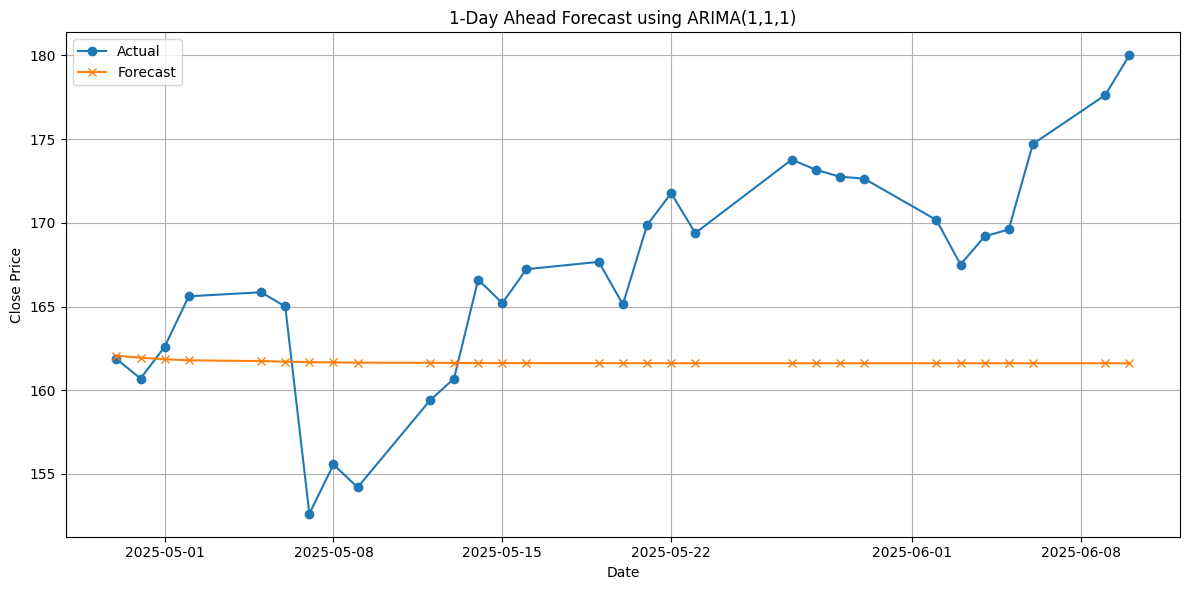

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

# Load and prepare data
df = pd.read_csv("Google_stock_data[1].csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Train-test split
train = df['Close'][:-30]
test = df['Close'][-30:]

# Fit ARIMA(1,1,1)
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast next 30 days
forecast = fitted_model.forecast(steps=30)

# RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label="Actual", marker='o')
plt.plot(test.index, forecast.values, label="Forecast", marker='x')
plt.title("1-Day Ahead Forecast using ARIMA(1,1,1)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


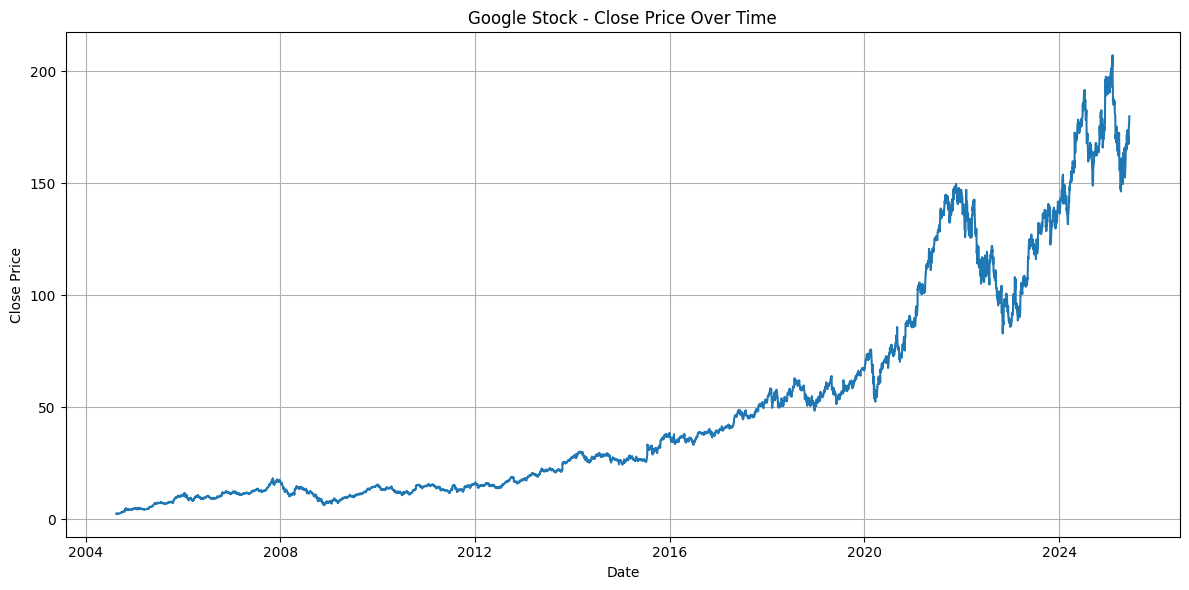

(np.float64(0.8196927180876263), np.float64(0.9919474862665574), 33, 5202)

In [8]:
from statsmodels.tsa.stattools import adfuller

# Plot the original Close price series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Close'])
plt.title("Google Stock - Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(df['Close'])

adf_result[:4]  # Show test statistic, p-value, and used lags/info criteria


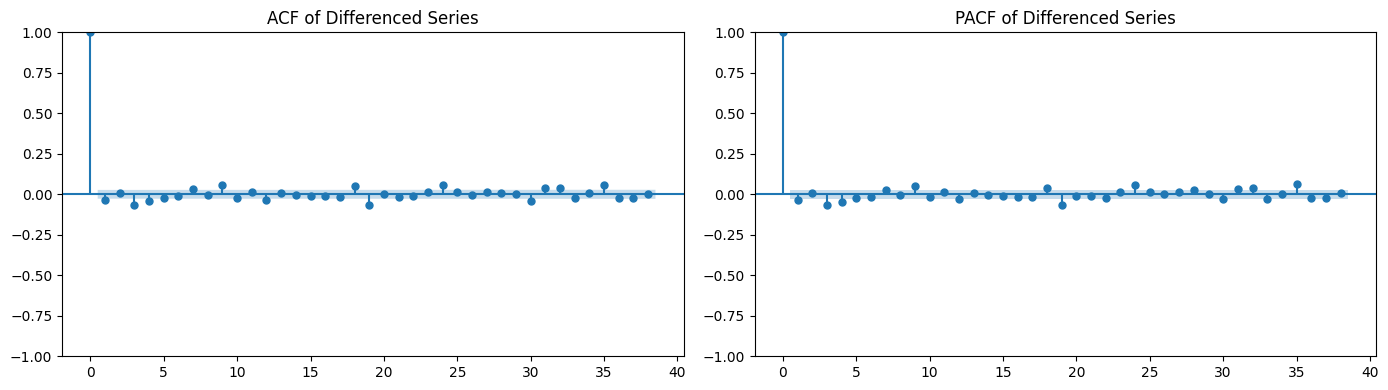

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# First differencing to make the series stationary
df['Close_diff'] = df['Close'].diff().dropna()

# Plot ACF and PACF for differenced data
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df['Close_diff'].dropna(), ax=axes[0])
plot_pacf(df['Close_diff'].dropna(), ax=axes[1])
axes[0].set_title("ACF of Differenced Series")
axes[1].set_title("PACF of Differenced Series")
plt.tight_layout()
plt.show()


Now

In [10]:
# Retrain ARIMA(1,1,1) on the full dataset for 1-day ahead forecast
model_full = ARIMA(df['Close'], order=(1, 1, 1))
fitted_full_model = model_full.fit()

# Forecast the next 1 day
one_day_forecast = fitted_full_model.forecast(steps=1)
one_day_forecast


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,0
5236,179.927745


The ARIMA model predicts that the next day's closing stock price for Google will be approximately $179.93.

In [14]:
# Retrain ARIMA(1,1,1) on the full dataset for 1-day ahead forecast
model_full = ARIMA(df['Close'], order=(1, 1, 1))
fitted_full_model = model_full.fit()

# Forecast the next 1 day
seven_day_forecast = fitted_full_model.forecast(steps=7)
seven_day_forecast


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,predicted_mean
5236,179.927745
5237,179.971726
5238,179.948208
5239,179.960784
5240,179.954059
5241,179.957655
5242,179.955732


This shows that there wont be much changes to the stock price of Google over the next 7 days.

Now I will be comparing ARIMA to SOTA models such as XGBoost.

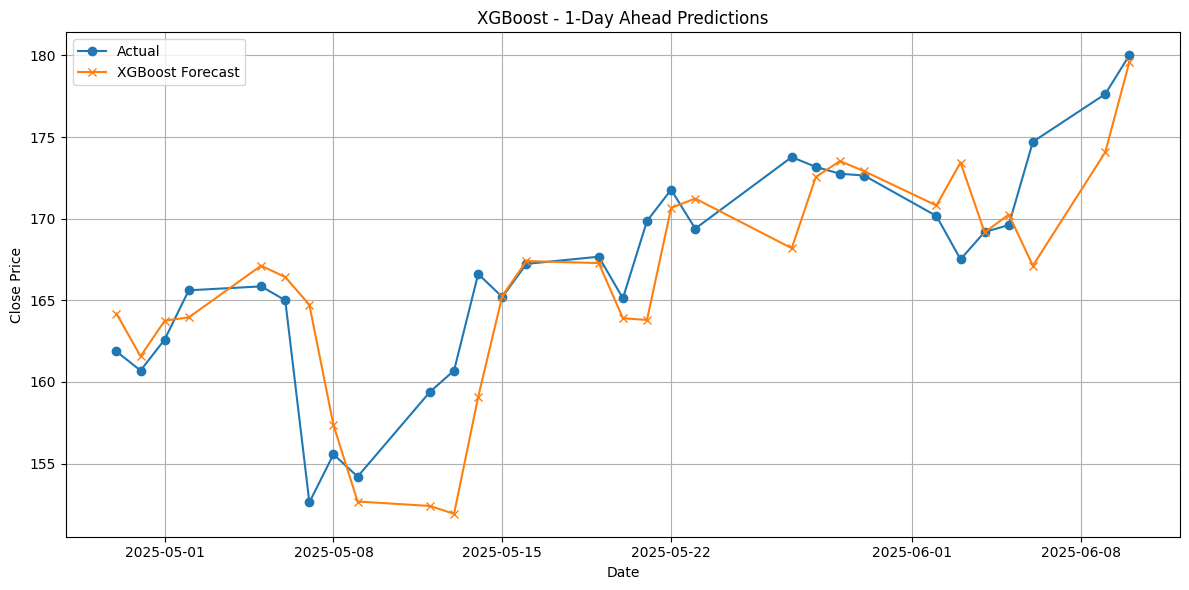

np.float64(4.204840213317745)

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Prepare lag features for XGBoost (using only Close for now)
df_ml = df[['Close']].copy()

# Create lag features
for lag in range(1, 8):  # 7 previous days as features
    df_ml[f'lag_{lag}'] = df_ml['Close'].shift(lag)

# Drop rows with NaN values (due to lagging)
df_ml.dropna(inplace=True)

# Define features and target
X = df_ml[[f'lag_{i}' for i in range(1, 8)]]
y = df_ml['Close']

# Train-test split (last 30 days for testing)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predict for test set (1-step ahead prediction)
xgb_predictions = xgb_model.predict(X_test)

# RMSE for comparison
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, xgb_predictions, label='XGBoost Forecast', marker='x')
plt.title("XGBoost - 1-Day Ahead Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

xgb_rmse


In [16]:
# Fix after reset: re-import missing dependency and retry forecast loop
from xgboost import XGBRegressor

# Recreate the model and retrain to avoid missing state
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Perform recursive 7-day forecast
multi_day_forecast = []

# Start with the last 7 known Close prices
last_known = df['Close'].iloc[-7:].tolist()

for _ in range(7):
    input_features = np.array(last_known[-7:]).reshape(1, -1)
    next_pred = xgb_model.predict(input_features)[0]
    multi_day_forecast.append(next_pred)
    last_known.append(next_pred)

multi_day_forecast


[np.float32(171.54274),
 np.float32(168.77266),
 np.float32(171.30605),
 np.float32(165.38017),
 np.float32(166.9422),
 np.float32(180.47968),
 np.float32(178.46257)]

In [24]:
# Remove the import for ace_tools
# import ace_tools as tools

# Import the standard display function
from IPython.display import display

# Create DataFrame to compare forecasts
comparison_df = pd.DataFrame({
    'Day': [f'Day {i+1}' for i in range(7)],
    'ARIMA': seven_day_forecast.values,
    'XGBoost': multi_day_forecast
})
comparison_df['Difference'] = comparison_df['XGBoost'] - comparison_df['ARIMA']
comparison_df['Absolute Difference'] = comparison_df['Difference'].abs()

# Calculate basic statistics on the difference
stats_summary = comparison_df['Difference'].describe()

# Use IPython.display.display instead of ace_tools.display_dataframe_to_user
# You can optionally add a print statement for a title if desired
print("ARIMA vs XGBoost Forecast Comparison:")
display(comparison_df)

stats_summary

ARIMA vs XGBoost Forecast Comparison:


,Day,ARIMA,XGBoost,Difference,Absolute Difference
0,Day 1,179.927745,171.542740,-8.385005,8.385005
1,Day 2,179.971726,168.772659,-11.199067,11.199067
2,Day 3,179.948208,171.306046,-8.642162,8.642162
3,Day 4,179.960784,165.380173,-14.580611,14.580611
4,Day 5,179.954059,166.942200,-13.011859,13.011859
5,Day 6,179.957655,180.479675,0.522020,0.522020
6,Day 7,179.955732,178.462570,-1.493162,1.493162


,Difference
count,7.000000
mean,-8.112835
std,5.687596
min,-14.580611
25%,-12.105463
50%,-8.642162
75%,-4.939083
max,0.522020


from matplotlib import pyplot as plt
comparison_df['ARIMA'].plot(kind='hist', bins=20, title='ARIMA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['XGBoost'].plot(kind='hist', bins=20, title='XGBoost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Difference'].plot(kind='hist', bins=20, title='Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Absolute Difference'].plot(kind='hist', bins=20, title='Absolute Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='ARIMA', y='XGBoost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='XGBoost', y='Difference', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Difference', y='Absolute Difference', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['ARIMA'].plot(kind='line', figsize=(8, 4), title='ARIMA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['XGBoost'].plot(kind='line', figsize=(8, 4), title='XGBoost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Difference'].plot(kind='line', figsize=(8, 4), title='Difference')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Absolute Difference'].plot(kind='line', figsize=(8, 4), title='Absolute Difference')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='ARIMA', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='XGBoost', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='Difference', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='Absolute Difference', y='Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)